<a href="https://colab.research.google.com/github/youngchaekime/git_test/blob/master/Time-Series%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas_datareader as webreader

import math

import numpy as np

import pandas as pd

from datetime import date, timedelta, datetime

from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential

from keras.layers import LSTM, Dense, Dropout

from keras.callbacks import EarlyStopping

from sklearn.preprocessing import RobustScaler, MinMaxScaler

import yfinance as yf

# **1. Loading the time series data**

In [24]:
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2010-01-01'

stockname = 'S&P500'
symbol = '^GSPC'

df = yf.download(tickers=['^GSPC'], start=date_start, end=date_today)

print(df.shape)
df.head(5)

[*********************100%***********************]  1 of 1 completed
(3406, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


# **2. Plotting the price chart**

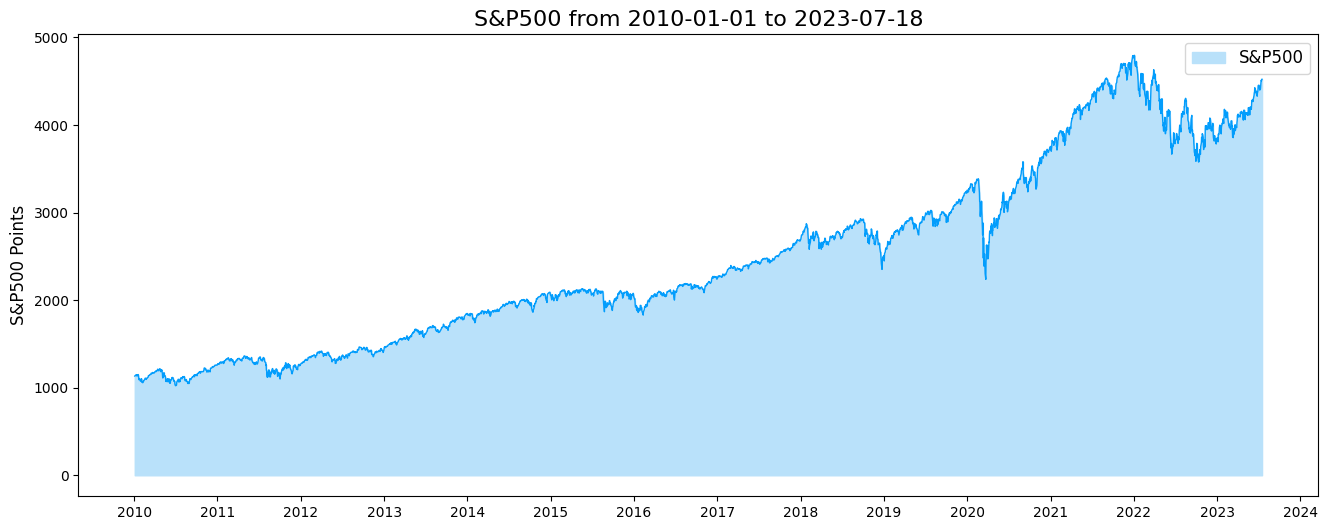

In [26]:
pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()
fig, ax1 = plt.subplots(figsize=(16,6))
ax1.xaxis.set_major_locator(years)
x=df.index
y=df['Close']
ax1.fill_between(x,0,y,color='#b9e1fa')
ax1.legend([stockname],fontsize=12)
plt.title(stockname + ' from ' + date_start + ' to ' + date_today, fontsize=16)
plt.plot(y, color='#039dfc', label='S&P500', linewidth=1.0)
plt.ylabel('S&P500 Points', fontsize=12)
plt.show()

# **3. Splitting the data**

In [27]:
data = df.filter(['Close'])
npdataset = data.values

training_data_length = math.ceil(len(npdataset)*0.8)

mmscaler = MinMaxScaler(feature_range=(0,1))
scaled_data = mmscaler.fit_transform(npdataset)
scaled_data

array([[0.02925558],
       [0.03019094],
       [0.03035522],
       ...,
       [0.92408014],
       [0.92285594],
       [0.92745854]])

# **4. Creating the input shape**

In [30]:
train_data = scaled_data[0:training_data_length, :]

x_train=[]
y_train=[]
trainingdatasize=len(train_data)
for i in range(100, trainingdatasize):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
print(y_train.shape)

(2625, 100, 1)
(2625,)


# **5. Building the model**

In [31]:
model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


# **6. Training the Model**

In [32]:
history = model.fit(x_train,y_train, batch_size=16, epochs=25)

Epoch 1/25
165/165 [==============================] - 51s 266ms/step - loss: 0.0022 - accuracy: 3.8095e-04
Epoch 2/25
165/165 [==============================] - 39s 233ms/step - loss: 2.5997e-04 - accuracy: 3.8095e-04
Epoch 3/25
165/165 [==============================] - 43s 263ms/step - loss: 2.1841e-04 - accuracy: 3.8095e-04
Epoch 4/25
165/165 [==============================] - 38s 229ms/step - loss: 1.9038e-04 - accuracy: 3.8095e-04
Epoch 5/25
165/165 [==============================] - 24s 145ms/step - loss: 1.6563e-04 - accuracy: 3.8095e-04
Epoch 6/25
165/165 [==============================] - 46s 276ms/step - loss: 1.4563e-04 - accuracy: 3.8095e-04
Epoch 7/25
165/165 [==============================] - 42s 257ms/step - loss: 1.5213e-04 - accuracy: 3.8095e-04
Epoch 8/25
165/165 [==============================] - 25s 150ms/step - loss: 1.9110e-04 - accuracy: 3.8095e-04
Epoch 9/25
165/165 [==============================] - 33s 201ms/step - loss: 1.2766e-04 - accuracy: 3.8095e-04
Epoch

# **7. Evaluating model performance**

In [33]:
test_data = scaled_data[training_data_length-100:,:]

x_test=[]
y_test=npdataset[training_data_length:,:]

for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i,0])

x_test=np.array(x_test)

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [34]:
predictions = model.predict(x_test)
predictions = mmscaler.inverse_transform(predictions)

22/22 [==============================] - 3s 71ms/step


In [35]:
mae = mean_absolute_error(predictions, y_test)
print('MAE:' + str(round(mae,1)))

rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('RMSE:' + str(round(rmse,1)))

MAE:48.9
RMSE:33.7


# **8. Plotting test predictions**

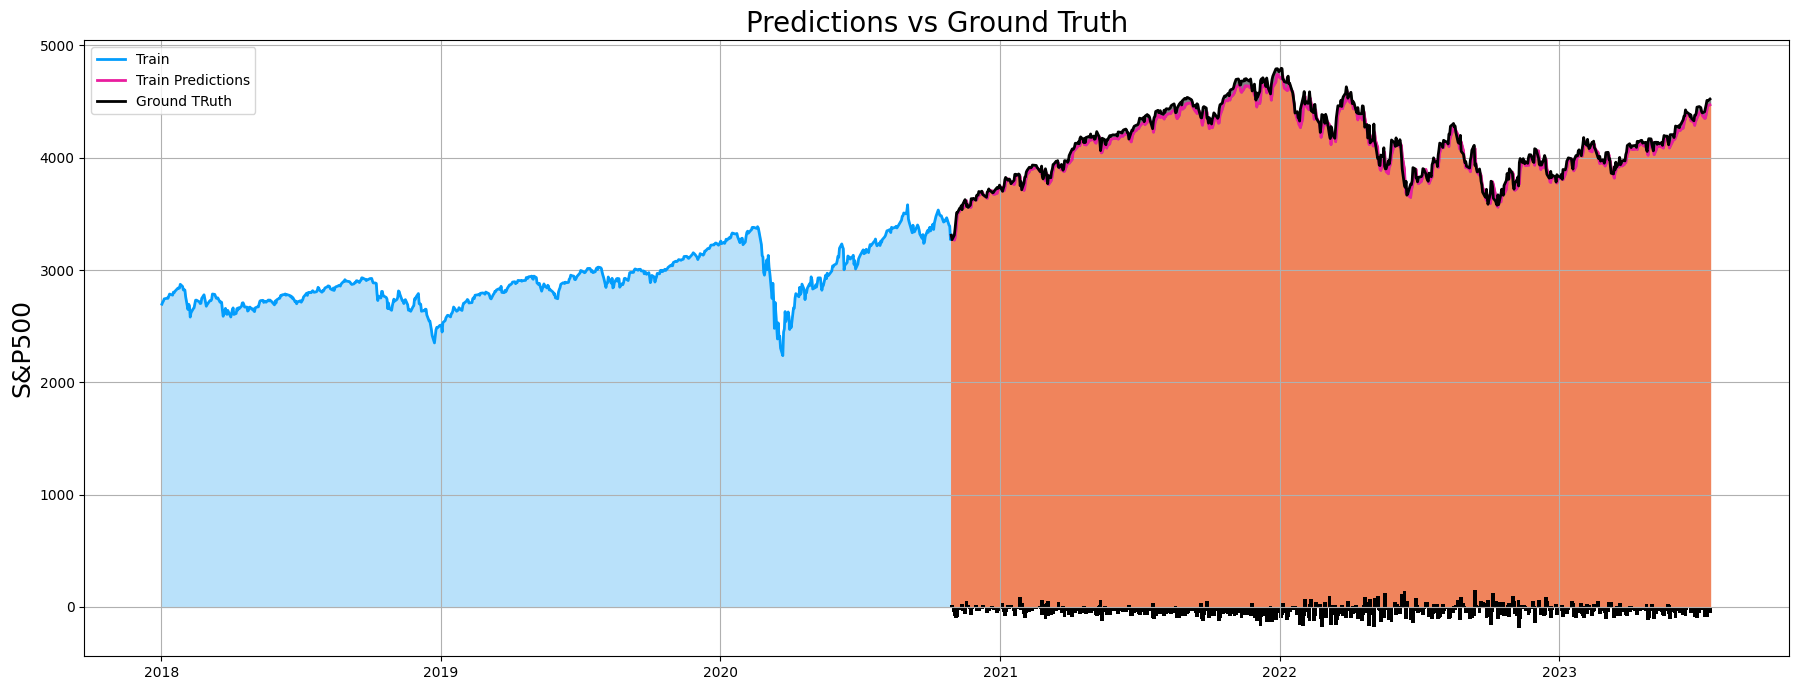

In [39]:
display_start_date = "2018-01-01"

train = data[:training_data_length+1]
valid = data[training_data_length:]
valid.insert(1,"Predictions",predictions,True)
valid.insert(1,"Difference",valid["Predictions"]-valid["Close"],True)

valid=valid[valid.index>display_start_date]
train=train[train.index>display_start_date]

fig, ax1 = plt.subplots(figsize=(22,8), sharex=True)
xt = train.index; yt = train[["Close"]]
xv = valid.index; yv = valid[["Close", "Predictions"]]

plt.title("Predictions vs Ground Truth", fontsize=20)
plt.ylabel(stockname,fontsize=18)
plt.plot(yt, color='#039dfc', linewidth=2.0)
plt.plot(yv["Predictions"], color='#E91D9E', linewidth=2.0)
plt.plot(yv["Close"], color='black',linewidth=2.0)
plt.legend(["Train", "Train Predictions", "Ground TRuth"], loc='upper left')

ax1.fill_between(xt, 0, yt["Close"], color="#b9e1fa")
ax1.fill_between(xv, 0, yv["Predictions"], color="#F0845C")
ax1.fill_between(xv, yv["Close"], yv["Predictions"], color="grey")

x=valid.index
y=valid["Difference"]
plt.bar(x,y,width=5, color="black")
plt.grid()
plt.show()


# **9. Stock Market prediction - looking one day ahead**

In [41]:
price_quote = yf.download(tickers=['^GSPC'], start=date_start, end=date_today)

new_df = price_quote.filter(['Close'])

last_100_days=new_df[-100:].values
last_100_days_scaled=mmscaler.transform(new_df[-100:].values)

X_test=[]
X_test.append(last_100_days_scaled)

X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)
pred_price=mmscaler.inverse_transform(pred_price)
date_tomorrow=date.today()+timedelta(days=1)
print('The price for '+stockname+ ' price at date'+str(date_tomorrow)
          +' is: ' + str(round(pred_price[0,0],0)))

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 36ms/step
The price for S&P500 price at date2023-07-19 is: 4478.0
